In [47]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

In [48]:
file_path = 'C:/Users/andre/OneDrive/Documentos/GitHub/DataMining_G31/Data/DM2425_ABCDEats_DATASET.csv'
pd.set_option('display.max_columns', None)
df = pd.read_csv(file_path)
df.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.0,0.0,0.0,0.0,0.0,0.0,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
import sys
import os

# Add parent directory (one level up) to the path
sys.path.append(os.path.abspath(os.path.join('..')))

# Now you should be able to import from the Functions folder
from Functions.CleanUp import cleanUp

In [50]:
# Now you can call the function
df, columns_dict = cleanUp(df)

-----------looking for incostisencies -----------
There are repeated values in the dataset
      customer_id customer_region  customer_age  vendor_count  product_count  \
20855  742ca068fc            8550          20.0             1              2   
20907  742ca068fc            8550          20.0             1              2   

       is_chain  first_order  last_order last_promo payment_method  \
20855         0         35.0          35          -           CARD   
20907         0         35.0          35          -           CARD   

       CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  CUI_Chicken Dishes  \
20855           0.0        0.0            0.0       0.0                 0.0   
20907           0.0        0.0            0.0       0.0                 0.0   

       CUI_Chinese  CUI_Desserts  CUI_Healthy  CUI_Indian  CUI_Italian  \
20855          0.0           0.0          0.0         0.0          0.0   
20907          0.0           0.0          0.0         0.0          0.0 

In [51]:
df.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,used_promo,delta_day_order,tot_value_cui,order_freq,value_freq,avg_order_value
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,True,2.0,28.88,2.500000,14.440,5.776
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,True,2.0,19.21,1.000000,9.605,9.605
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,True,2.0,9.20,1.000000,4.600,4.600
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.0,0.0,0.0,0.0,0.0,0.0,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,True,3.0,31.56,1.000000,10.520,10.520
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,No_Promo,DIGI,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,3.0,55.44,1.666667,18.480,11.088


## Descriptive Stats for Numerical Columns

In [67]:
numerical_columns = df.select_dtypes(include=['number']).columns
DOW_columns = [col for col in df.columns if col.startswith('DOW')]
HR_columns = [col for col in df.columns if col.startswith('HR')]
CUI_columns = [col for col in df.columns if col.startswith('CUI')]

# Loop through columns and handle non-numerical ones
for col in df.columns:
    if col not in numerical_columns:
        print(f"Non-numerical column: {col}")

combined_columns = CUI_columns + HR_columns  # Concatenates the two lists
# Remove HR and CUI columns from numerical_columns
numerical_columns = [i for i in numerical_columns if i not in combined_columns]
# Remove the new Features from the numerical columns
new_features = df.iloc[:, -5:].columns
numerical_columns = [i for i in numerical_columns if i not in new_features]

Non-numerical column: customer_id
Non-numerical column: customer_region
Non-numerical column: last_promo
Non-numerical column: payment_method
Non-numerical column: used_promo


In [71]:
for i in numerical_columns:
    print("Numerical columns: "+ i)

Numerical columns: customer_age
Numerical columns: vendor_count
Numerical columns: product_count
Numerical columns: is_chain
Numerical columns: first_order
Numerical columns: last_order
Numerical columns: DOW_0
Numerical columns: DOW_1
Numerical columns: DOW_2
Numerical columns: DOW_3
Numerical columns: DOW_4
Numerical columns: DOW_5
Numerical columns: DOW_6


In [75]:
df[numerical_columns].describe().T.to_excel("C:/Users/andre/OneDrive/Ambiente de Trabalho/NOVA IMS/Data Mining/Numerical_Feature_Discription.xlsx")

## Total Orders by Region

In [38]:
DOW_columns = [col for col in df.columns if col.startswith('DOW')]
total_orders = df.groupby("customer_region")[DOW_columns].sum().sum(axis=1)

total_orders

customer_region
2360    45791
2440     7340
2490     2023
4140     2743
4660    43935
8370     1292
8550      100
8670    34592
dtype: int64

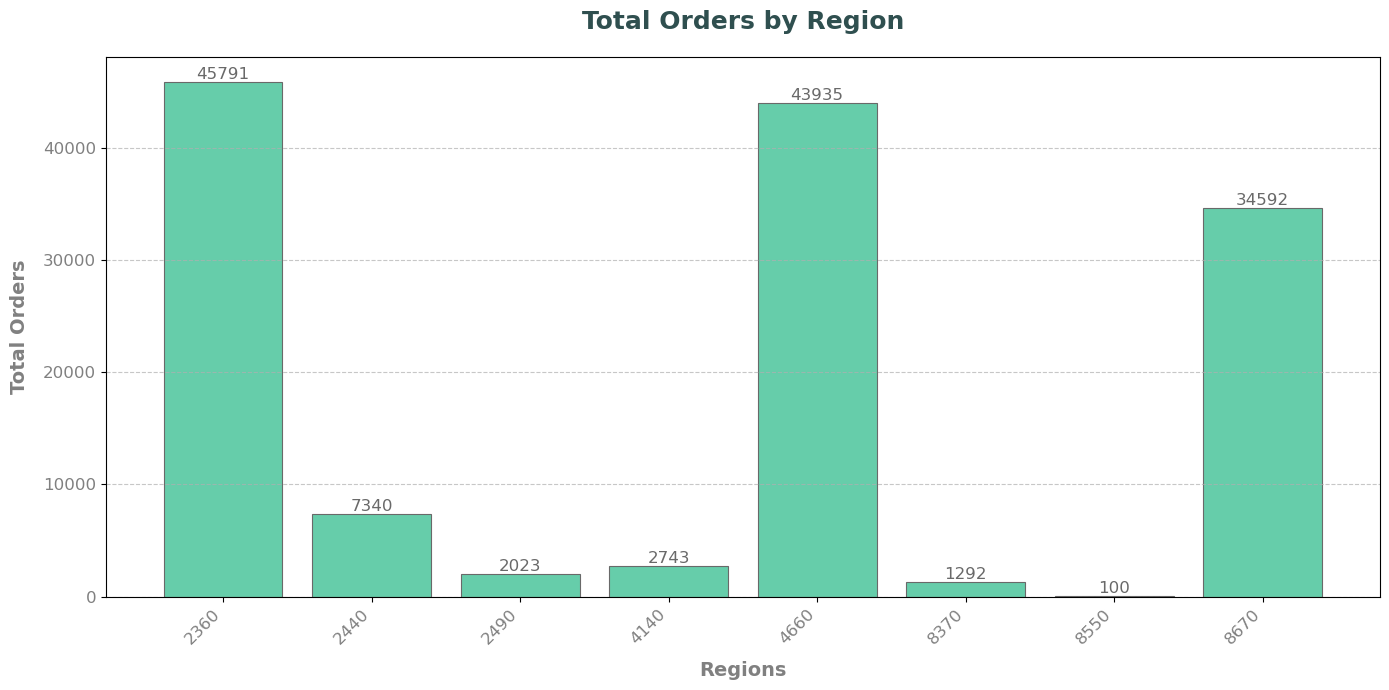

In [39]:
# Setting the figure size
plt.figure(figsize=(14, 7))

# Creating the bar chart with refined color and edge border
plt.bar(x=total_orders.index, height=total_orders.values, color='mediumaquamarine', edgecolor='dimgray', linewidth=0.8)

# Title and axis labels with formatting
plt.title("Total Orders by Region", fontsize=18, fontweight='bold', color='darkslategray', pad=20)
plt.xlabel("Regions", fontsize=14, labelpad=10, color='gray', fontweight='bold')
plt.ylabel("Total Orders", fontsize=14, labelpad=10, color='gray',fontweight='bold')

# Adding value labels above each bar
for i, value in enumerate(total_orders.values):
    plt.text(i, value + 0.5, f'{value}', ha='center', va='bottom', fontsize=12, color='dimgray')

# Adding subtle grid lines on the y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improving spacing of the bars
plt.xticks(rotation=45, ha='right', fontsize=12, color='gray')
plt.yticks(fontsize=12, color='gray')

# Displaying the chart
plt.tight_layout()
plt.show()

## Promotions Breakdown

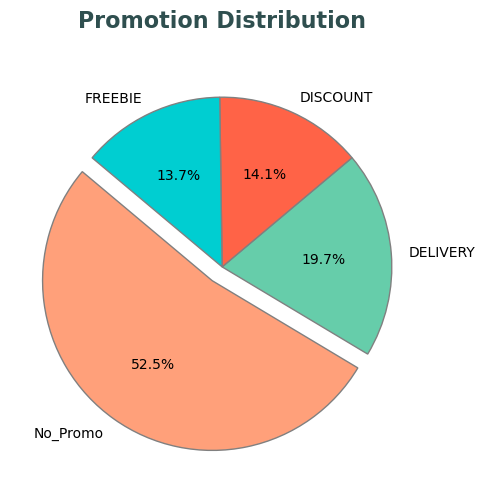

In [9]:
# Adjusted colors
colors = ['lightsalmon', 'mediumaquamarine', 'tomato', 'darkturquoise']

# Configuring the pie chart with labels and highlighting the most relevant slice
plt.figure(figsize=(10, 5))  # Setting figure size
plt.pie(df.last_promo.value_counts(), 
        colors=colors, 
        labels=df.last_promo.value_counts().index,  # Labels for each slice
        autopct='%1.1f%%',  # Percentages on each slice
        startangle=140,  # Starting angle for better layout
        explode=(0.1, 0, 0, 0),  # Highlight the first slice (adjust as needed)
        wedgeprops={'edgecolor': 'gray'})  # Gray borders for contrast

# Chart title
plt.title("Promotion Distribution", fontsize=16, fontweight='bold', color='darkslategray', pad=20)

# Displaying the chart
plt.tight_layout()
plt.show()

### See if the Promotion affects the Fidelity of a Client

In [13]:
delta_day_order_by_promo = df.groupby('last_promo')['delta_day_order'].mean()
delta_day_order_by_promo

last_promo
DELIVERY    23.638822
DISCOUNT    31.976978
FREEBIE     37.037267
No_Promo    42.207695
Name: delta_day_order, dtype: float64

## New Features Discriptive Data

In [77]:
new_features = df.iloc[:, -5:]
new_features.describe().T.to_excel("C:/Users/andre/OneDrive/Ambiente de Trabalho/NOVA IMS/Data Mining/New_Features_Discription.xlsx")

## Missing Values Summary Table

In [ ]:
missing_summary = pd.DataFrame({
    'Missing Values Count': df.isnull().sum(),
    'Missing Values Percentage': round(df.isnull().sum() / df.shape[0] * 100, 2)
})
missing_summary.to_excel

,Missing Values Count,Missing Values Percentage
customer_id,0,0.00
customer_region,442,1.39
customer_age,727,2.28
vendor_count,0,0.00
product_count,0,0.00
...,...,...
delta_day_order,106,0.33
tot_value_cui,0,0.00
order_freq,106,0.33
value_freq,106,0.33
